### IMPORTS

In [105]:
import sys
import os
sys.executable

'c:\\Users\\luisb\\AppData\\Local\\Programs\\Python\\Python312\\python.exe'

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [107]:
SAVE_PATH = "../saves/"

In [108]:
def get_pareto(arr):
    # Convert the array to a numpy array
    arr_np = np.array(arr)

    # Initialize a boolean mask to keep track of pareto-efficient elements
    is_pareto_efficient = np.ones(arr_np.shape[0], dtype=bool)

    for i in range(arr_np.shape[0]):
        if is_pareto_efficient[i]:
            # Compare the current element with all other elements using broadcasting
            is_dominated = np.all(arr_np[i] <= arr_np, axis=1) & np.any(arr_np[i] < arr_np, axis=1)
            # Update the mask to mark dominated elements as False
            is_pareto_efficient[is_dominated] = False

    # Return the pareto-efficient elements
    return is_pareto_efficient

In [109]:
savefiles = [file for file in os.listdir(SAVE_PATH)] 
savefiles

['pareto.csv',
 'saves_1710502540563.csv',
 'saves_1710502616293.csv',
 'saves_1710502702203.csv',
 'saves_1710502795933.csv',
 'saves_1710513923401.csv',
 'saves_1710514182799.csv',
 'saves_1710514219897.csv',
 'saves_1710514418808.csv',
 'saves_1710514601277.csv',
 'saves_1710514689193.csv',
 'saves_1710514832352.csv',
 'saves_1710515003559.csv',
 'saves_1710515295123.csv',
 'saves_1710515637176.csv']

### VISUALIZATION

In [110]:
pareto = pd.read_csv(SAVE_PATH+'pareto.csv', sep=';')
pareto

,utilA,utilB,utilSum,contract,pareto
0,1655,7362,9017,"[34,4,129,70,19,87,121,178,127,132,130,84,77,1...",True
1,1680,7337,9017,"[34,4,129,70,19,87,121,178,127,132,130,84,77,1...",True
2,1685,7332,9017,"[34,4,129,70,19,87,121,178,127,132,130,84,77,1...",True
3,1660,7357,9017,"[34,4,129,70,19,87,121,178,127,132,130,84,77,1...",True
4,1666,7353,9019,"[34,4,129,70,19,87,121,178,127,132,130,84,77,1...",True
...,...,...,...,...,...
535,7080,6273,13353,"[198,29,90,41,187,60,179,47,26,145,115,152,163...",True
536,7151,6272,13423,"[198,29,90,41,187,60,179,47,26,145,115,152,163...",True
537,7256,6270,13526,"[198,29,90,41,187,60,179,47,26,145,115,152,163...",True
538,7402,6269,13671,"[198,29,90,41,187,60,179,47,26,145,115,152,163...",True


In [111]:
for savefile in savefiles:
    contracts = pd.read_csv(SAVE_PATH + savefile, sep=';')
    if "pareto" not in contracts.columns:
        contracts["pareto"] = get_pareto(contracts[["utilA","utilB"]])
        contracts = contracts.sort_values(by="utilSum", ascending=False).drop_duplicates()
        contracts.to_csv(SAVE_PATH+savefile, sep=';', index=False)
    if "index" in contracts.columns:
        contracts = contracts.drop(columns=["index"])
        contracts.to_csv(SAVE_PATH+savefile, sep=';', index=False)
        print(savefile, "saved without index")
    pareto = pd.concat([pareto, contracts[contracts["pareto"]]])
pareto = pareto.sort_values(by="utilSum", ascending=False).drop_duplicates()
pareto["pareto"] = get_pareto(pareto[["utilA","utilB"]])
pareto = pareto[pareto["pareto"]].sort_values(by="utilSum", ascending=True)
pareto = pareto.drop_duplicates()

pareto.to_csv(SAVE_PATH+'pareto.csv', sep=';', index=False)
pareto

,utilA,utilB,utilSum,contract,pareto
14314,1680,7337,9017,"[34,4,129,70,19,87,121,178,127,132,130,84,77,1...",True
3,1660,7357,9017,"[34,4,129,70,19,87,121,178,127,132,130,84,77,1...",True
0,1655,7362,9017,"[34,4,129,70,19,87,121,178,127,132,130,84,77,1...",True
2,1685,7332,9017,"[34,4,129,70,19,87,121,178,127,132,130,84,77,1...",True
14947,1671,7348,9019,"[34,4,129,70,19,87,121,178,127,132,130,84,77,1...",True
...,...,...,...,...,...
24546,7080,6273,13353,"[198,29,90,41,187,60,179,47,26,145,115,152,163...",True
536,7151,6272,13423,"[198,29,90,41,187,60,179,47,26,145,115,152,163...",True
537,7256,6270,13526,"[198,29,90,41,187,60,179,47,26,145,115,152,163...",True
24660,7402,6269,13671,"[198,29,90,41,187,60,179,47,26,145,115,152,163...",True


(1007.5, 7772.5, 6178.15, 8154.85)

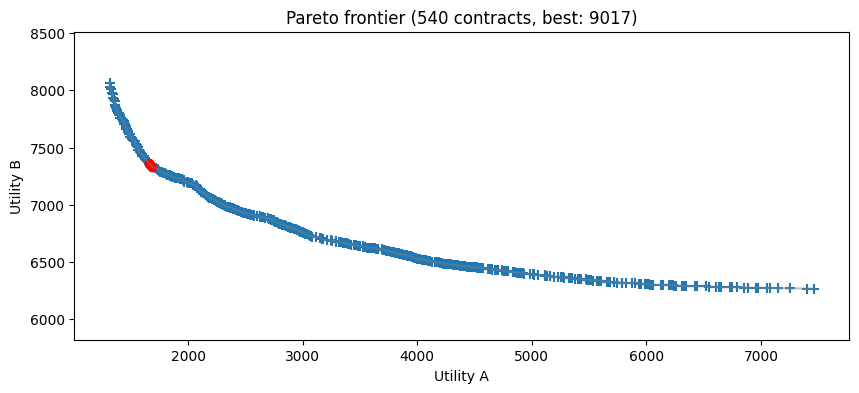

In [112]:
pareto = pareto.sort_values(by="utilA", ascending=True)
best_util = pareto[pareto["utilSum"] == pareto["utilSum"].min()]
plt.figure(figsize=(10,4))
plt.title(f"Pareto frontier ({len(pareto)} contracts, best: {pareto["utilSum"].min()})")
plt.plot(pareto["utilA"], pareto["utilB"], color='gray', linestyle='-', alpha=0.5)
plt.scatter(pareto["utilA"], pareto["utilB"], s=50, marker="+")
plt.scatter(best_util["utilA"], best_util["utilB"], marker="o", color="red")
plt.xlabel("Utility A")
plt.ylabel("Utility B")
plt.axis("equal")